# Contents

## [What is Polynomial Regression?](#what-is-polynomial-regression)

## [How to Realize Polynomial Transformation?](#how-to-realize-polynomial-transformation)

## [Coding Practice](#coding-practice)

## [Conclusion](#conclusion)

# <a name="what-is-polynomial-regression"></a>What is Polynomial Regression?


Linear regression is a statistical model that represents a linear relationship between data. The linear regression technique tries its best to fit a line to the mapping between features and targets.

However, in real-life problems, datasets are often non-linear. When we try to fit a linear line to such datasets, the model's error rate increases, and it fails to provide an accurate representation.

In such cases, expanding the feature set using polynomial transformation is a widely accepted approach to capture non-linear relationships. By applying polynomial transformation, we can create new features that allow the model to better fit the data.

We can use open-source libraries to perform polynomial transformations. 


## <a name="how-to-realize-polynomial-transformation"></a>How to Realize Polynomial Transformation

X = [1, 2, 3, 4, 5]

After applying the second degree polynomial transformation the new data set will be below

X = [1, 2, 3, 4, 5]

X^2 = [1, 4, 9, 16, 25]

After applying the third degree polynomial transformation the new data set will be below

X = [1, 2, 3, 4, 5]

X^2 = [1, 4, 9, 16, 25]

X^3 = [1, 8, 27, 64, 125]


# <a name="coding-practice"></a>Coding Practice

## How to Apply Polynomial Transformation with open source frame worjk

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


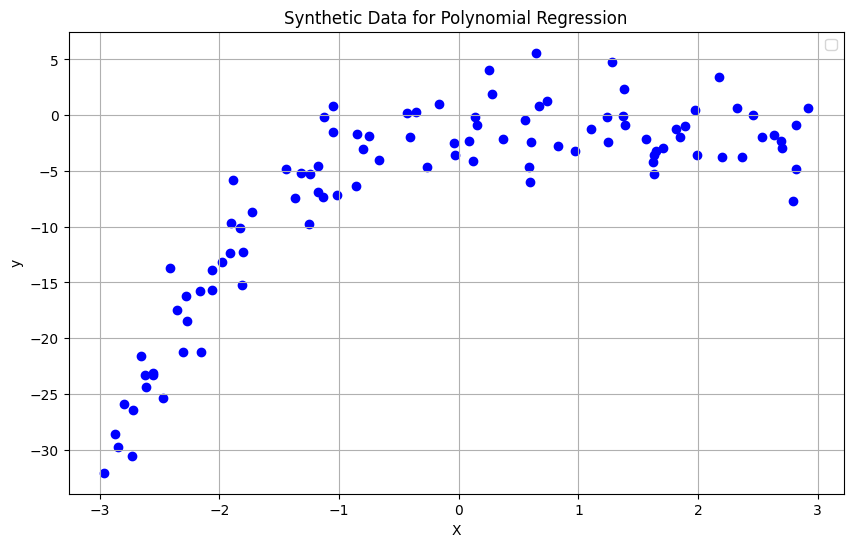

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating synthetic dataset 
np.random.seed(42)
X = np.random.uniform(-3, 3, 100)
y = 0.5 * X**3 - 2 * X**2 + X + np.random.normal(0, 3, 100)

# merging X and y
data = pd.DataFrame({'X': X, 'y': y})

# Viz the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.title('Synthetic Data for Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [176]:
# define feature and targer
X = data[['X']].values  
y = data['y'].values 

In [177]:
model = LinearRegression()
model.fit(X, y)
X_fit = np.linspace(-3, 3, 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_train_pred = model.predict(X)
mse = mean_squared_error(y, y_train_pred)
mae = mean_absolute_error(y, y_train_pred)
r2 = r2_score(y, y_train_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 34.3942252283463
Mean Absolute Error (MAE): 4.866889893734214
R² Score: 0.5695401466369447


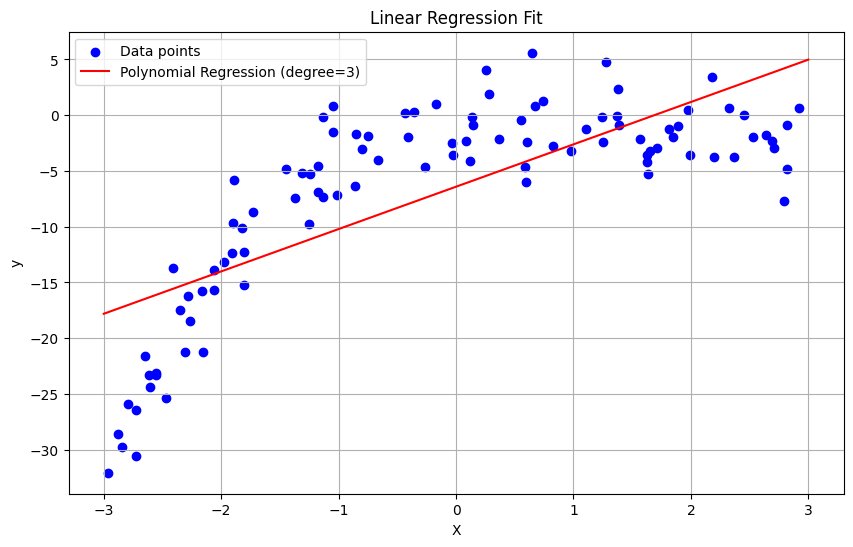

In [191]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', label=f'Polynomial Regression (degree={degree})')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


X_fit shape: (100, 1)
X_fit_poly shape: (100, 3)
Mean Squared Error (MSE): 6.952185709953951
Mean Absolute Error (MAE): 2.0504219286550596
R^2 Score: 0.9129901365304458


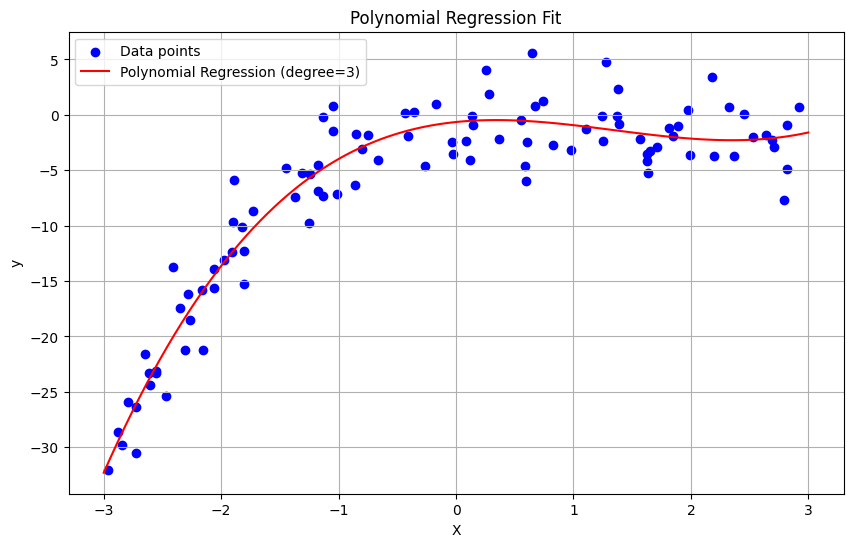

In [192]:
degree = 3


poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# train the model
model = LinearRegression()
model.fit(X_poly, y)


X_fit1 = np.linspace(-3, 3, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit1 = model.predict(X_fit_poly)

print("X_fit shape:", X_fit.shape)            # (100, 1)
print("X_fit_poly shape:", X_fit_poly.shape)  # (100, n) burada n polinom terimlerinin sayısıdır

# Modelin performans metriklerini hesaplama
y_train_pred1 = model.predict(X_poly)
mse1 = mean_squared_error(y, y_train_pred1)
mae1 = mean_absolute_error(y, y_train_pred1)
r21 = r2_score(y, y_train_pred1)

print(f"Mean Squared Error (MSE): {mse1}")
print(f"Mean Absolute Error (MAE): {mae1}")
print(f"R^2 Score: {r21}")

# Polinom regresyon sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit1, y_fit1, color='red', label=f'Polynomial Regression (degree={degree})')
plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


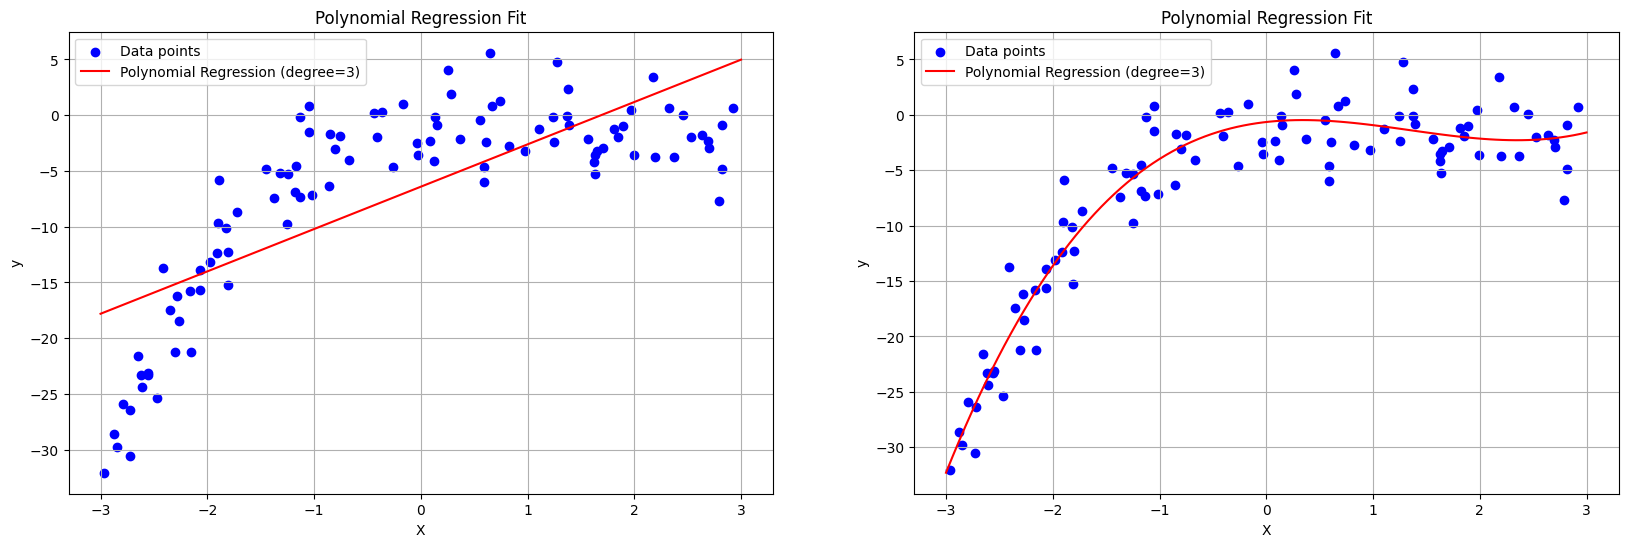

In [181]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# İlk grafik
axs[0].scatter(X, y, color='blue', label='Data points')
axs[0].plot(X_fit, y_fit, color='red', label=f'Polynomial Regression (degree={degree})')
axs[0].set_title('Polynomial Regression Fit')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

# İkinci grafik
axs[1].scatter(X, y, color='blue', label='Data points')
axs[1].plot(X_fit1, y_fit1, color='red', label=f'Polynomial Regression (degree={degree})')
axs[1].set_title('Polynomial Regression Fit')
axs[1].set_xlabel('X')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].grid(True)

plt.show()


In [190]:
print(f"Linear Regression:\nMSE: {mse}\nMAE: {mae}\nR^2: {r2}")
print(f"\nPolynomial Regression (degree={degree}):\nMSE: {mse1}\nMAE: {mae1}\nR^2: {r21}")


Linear Regression:
MSE: 34.3942252283463
MAE: 4.866889893734214
R^2: 0.5695401466369447

Polynomial Regression (degree=3):
MSE: 6.952185709953951
MAE: 2.0504219286550596
R^2: 0.9129901365304458


# <a name="conclusion"></a>Conclusion

- It is clear that the new model built using polynomial features has performed quite well compared to the linear regression model built using the original features. One of the most common methods used to model nonlinear relationships is polynomial regression. Polynomial regression can be used to model concave, convex, and two-peaked function shapes.
- Having a polynomial degree higher than necessary causes an increase in the complexity of the model and leads to overfitting.
- Having a polynomial degree lower than necessary results in lower model complexity, therefore, the model may not capture some nuances and thus leads to underfitting.

To make it clear, review the graph below!

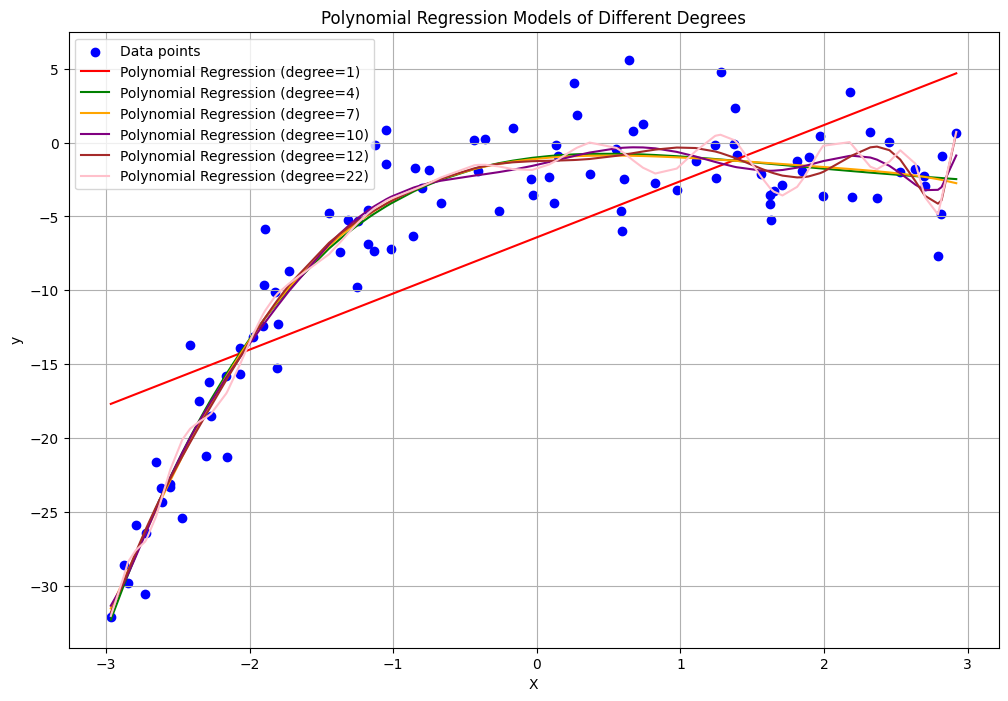

In [195]:
# Higher degree polynomial models

# Creating synthetic dataset
np.random.seed(42)
X = np.random.uniform(-3, 3, 100)
y =  * X**3 - 2 * X**2 + X + np.random.normal(0, 3, 100)
X = X[:, np.newaxis]  # Reshape X for sklearn

# Scatter plot of the data points
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Data points')

# Plotting polynomial regression models of different degrees
degrees = [1, 4, 7, 10, 12, 22]
colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink']
for degree, color in zip(degrees, colors):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)
    
    # Sort the values for better plotting
    sorted_zip = sorted(zip(X[:, 0], y_poly_pred))
    X_sorted, y_poly_pred_sorted = zip(*sorted_zip)
    
    plt.plot(X_sorted, y_poly_pred_sorted, color=color, label=f'Polynomial Regression (degree={degree})')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Models of Different Degrees')
plt.legend()
plt.grid(True)
plt.show()
